# Bragg Peak Analysis Tutorial

This short tutorial is presenting the analysis methods implemented in FREDtools braggPeak class. It is based on the example file SinglePencilBeam_150MeV.mhd available in the examples of the [GitHub repository](https://github.com/jasqs/FREDtools). The MetaImage file is a dose distribution in water of a single pencil (PB) beam with initial energy 150 MeV calculated in a Monte Carlo simulation. The the PB was simulated in a water phantom of size $10x10x30\,cm^3$ with voxel size $1x1x1\,mm^3$ and the beam was delivered along $Z$ axis.

In [1]:
# Import of FREDtools and other useful modules
import numpy as np
import matplotlib.pyplot as plt

import fredtools as ft
print("Current FREDtools version", ft.__version__)


Current FREDtools version 0.6.50


## Reading example file

In [2]:
img=ft.readMHD('SinglePencilBeam_150MeV.mhd', displayInfo=True)

### readMHD ###
# 3D image describing volume (3D)
# dims (xyz) =  [100 100 300]
# voxel size [mm] =  [1. 1. 1.]
# origin [mm]     =  [ -49.5  -49.5 -149.5]
# x-spatial voxel centre [mm] =  [   -49.500000,   -48.500000, ...,    48.500000,    49.500000 ]
# y-spatial voxel centre [mm] =  [   -49.500000,   -48.500000, ...,    48.500000,    49.500000 ]
# z-spatial voxel centre [mm] =  [  -149.500000,  -148.500000, ...,   148.500000,   149.500000 ]
# x-spatial extent [mm] =  [   -50.000000 ,    50.000000 ] =>   100.000000
# y-spatial extent [mm] =  [   -50.000000 ,    50.000000 ] =>   100.000000
# z-spatial extent [mm] =  [  -150.000000 ,   150.000000 ] =>   300.000000
# volume = 3000000.00 mm3  =>  3.00 l
# voxel volume = 1.00 mm3  =>  1.00 ul
# data type:  32-bit float 
# range: from  0.0  to  0.12405813 
# sum = 1888.603 , mean = 0.00062953436 ( 0.0042048595 ) 
# non-zero (dose=0)  voxels  = 1425720 (47.52%) => 1.43 l 
# non-air (HU>-1000) voxels  = 3000000 (100.00%) => 3.00 l 
# Addition

## Getting integral along $Z$ axis

In [3]:
imgInteg=ft.getInteg(img,axis='Z', displayInfo=False)

# setting the origin in Z direction to start the integral profile from zero
imgInteg.SetOrigin([img.GetOrigin()[0], img.GetOrigin()[1], 0.5])

ft.displayImageInfo(imgInteg)

### displayImageInfo ###
# 3D image describing profile (1D)
# dims (xyz) =  [  1   1 300]
# voxel size [mm] =  [100. 100.   1.]
# origin [mm]     =  [-49.5 -49.5   0.5]
# x-spatial voxel centre [mm] =  [   -49.500000 ]
# y-spatial voxel centre [mm] =  [   -49.500000 ]
# z-spatial voxel centre [mm] =  [     0.500000,     1.500000, ...,   298.500000,   299.500000 ]
# x-spatial extent [mm] =  [   -99.500000 ,     0.500000 ] =>   100.000000
# y-spatial extent [mm] =  [   -99.500000 ,     0.500000 ] =>   100.000000
# z-spatial extent [mm] =  [     0.000000 ,   300.000000 ] =>   300.000000
# length = 300.00 mm  =>  30.00 cm
# step size = 1.00 mm  =>  0.10 cm
# data type:  64-bit float 
# range: from  0.0  to  33.65445638473467 
# sum = 1888.6031549669465 , mean = 6.2953438498898215 ( 6.890453405638584 ) 
# non-zero (dose=0)  values  = 172 (57.33%) => 17.20 cm 
# non-air (HU>-1000) values  = 300 (100.00%) => 30.00 cm 
########################


## Bragg Peak Analysis

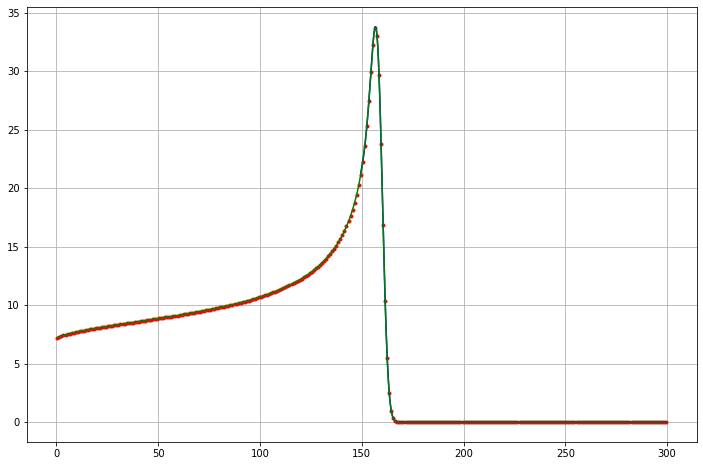

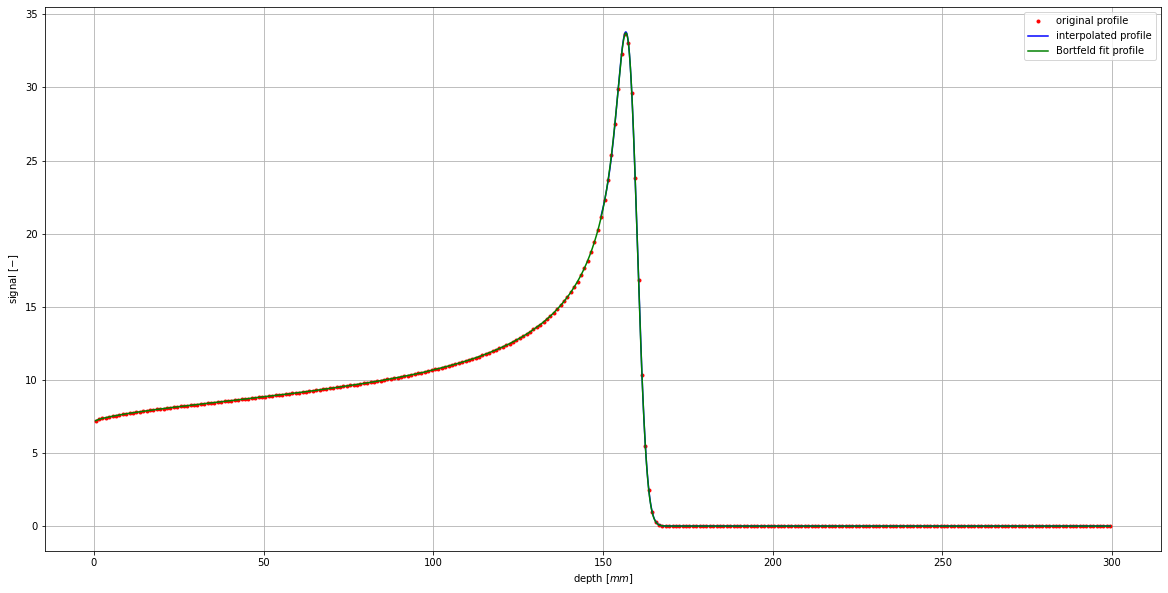

In [4]:
# create an instance of the braggPeak object
bp=ft.braggPeak(ft.pos(imgInteg), ft.vec(imgInteg))

# plot results
fig, ax = plt.subplots(figsize=[12,8])

ax.plot(ft.pos(imgInteg), ft.vec(imgInteg),'r.')
ax.plot(*bp.bpBort,'b-')
ax.plot(*bp.bpInterp,'g-')
ax.grid()

# a quick plot can be done with a method in the class
bp.plot



In [5]:
## calculate range of the Bragg Peak at 80% of the distal fall-off based on Bortfeld fit.
print('Range at R80D: {:.3f} mm'.format(bp.getRBort(0.8, 'D')))

# calculate width of the Bragg Peak at 60% of the maximum value of the interpolation.
print('Width at 60%: {:.3f} mm'.format(bp.getWInterp(0.6)))

# calculate signal (Gy*mm^2) of the Bragg Peak at 20 mm.
print('Signal at 20mm: {:.3f} Gy*mm^2'.format(bp.getDInterp(20)))

# display some results of the analysis for both methods
bp.displayInfo


Range at R80D: 158.970 mm
Width at 60%: 11.490 mm
Signal at 20mm: 8.021 Gy*mm^2
### braggPeak ###
# max value [-]:            33.65
# D100 Interp/Bort [-]:     33.72/33.80
# R10D Interp/Bort [mm]:    163.12/163.14
# R80D Interp/Bort [mm]:    158.99/158.97
# DFO9010 Interp/Bort [mm]: 4.78/4.82
# FWHM Interp/Bort [mm]:    17.65/nan
# Bortfeld fit chi-square [-]:                      0.05271
# Bortfeld range (R0) [mm]:                         158.99
# Bortfeld sigma of Gaussian range straggling [mm]: 1.37
# Bortfeld initial energy [MeV]:                    151.35
# Bortfeld sigma of Gaussian energy spectrum [MeV]: 1.11
#################


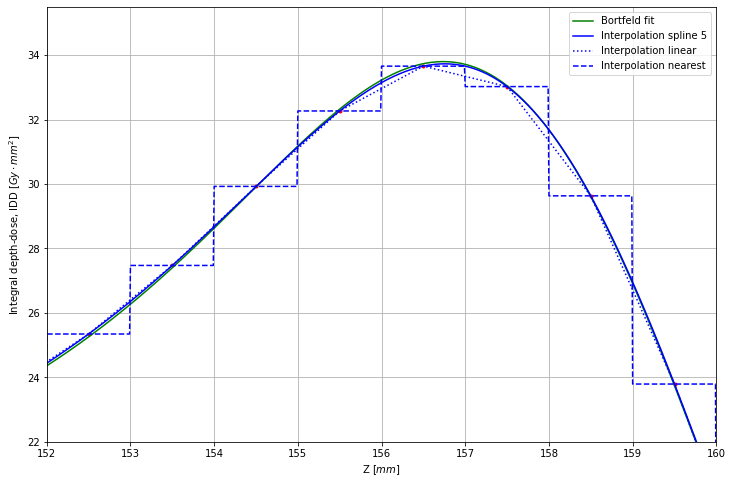

In [6]:
# compare interpolation methods.


fig, ax = plt.subplots(figsize=[12,8])

ax.plot(ft.pos(imgInteg), ft.vec(imgInteg),'r.')

ax.plot(*bp.bpBort, 'g-', label='Bortfeld fit')

bp.interpolation='spline' # it is default
bp.splineOrder=5 # the default is 3
ax.plot(*bp.bpInterp, 'b-', label='Interpolation spline 5')

bp.interpolation='linear' # it is default
ax.plot(*bp.bpInterp, 'b:', label='Interpolation linear')

bp.interpolation='nearest' # it is default
ax.plot(*bp.bpInterp, 'b--', label='Interpolation nearest')

ax.set_xlim(152,160)
ax.set_ylim(22,)
ax.set_xlabel('Z [$mm$]')
ax.set_ylabel('Integral depth-dose, IDD [$Gy \cdot mm^2$]')
ax.legend()

ax.grid()
